In [23]:
# Importacion de librerias a utilizar
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Maenejo simplificado de archivos
files = os.listdir('./Datasets/')
files = [ file for file in files if not(file.endswith('.pdf'))  ]
dict_files = {'df{}'.format(i+1): file for i, file in enumerate(files)}

### ETL Inicial, archivo: **Alternative Fuel Vehicles US.csv**

In [3]:
dict_files['df1']

'Alternative Fuel Vehicles US.csv'

In [4]:
df1 = pd.read_csv('./Datasets/' + dict_files['df1'])
df1.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [6]:
print(df1.duplicated().sum())
df1.drop_duplicates(inplace=True)

1


In [7]:
df1[['Conventional Fuel Economy City','Conventional Fuel Economy Highway', 'Conventional Fuel Economy Combined']]

,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined
0,21.0,22.0,21.0
1,29.0,38.0,32.0
2,28.0,36.0,31.0
3,24.0,30.0,26.0
4,26.0,34.0,29.0
...,...,...,...
877,NaN,NaN,NaN
878,NaN,NaN,NaN
879,NaN,NaN,NaN
880,NaN,NaN,NaN


<Axes: >

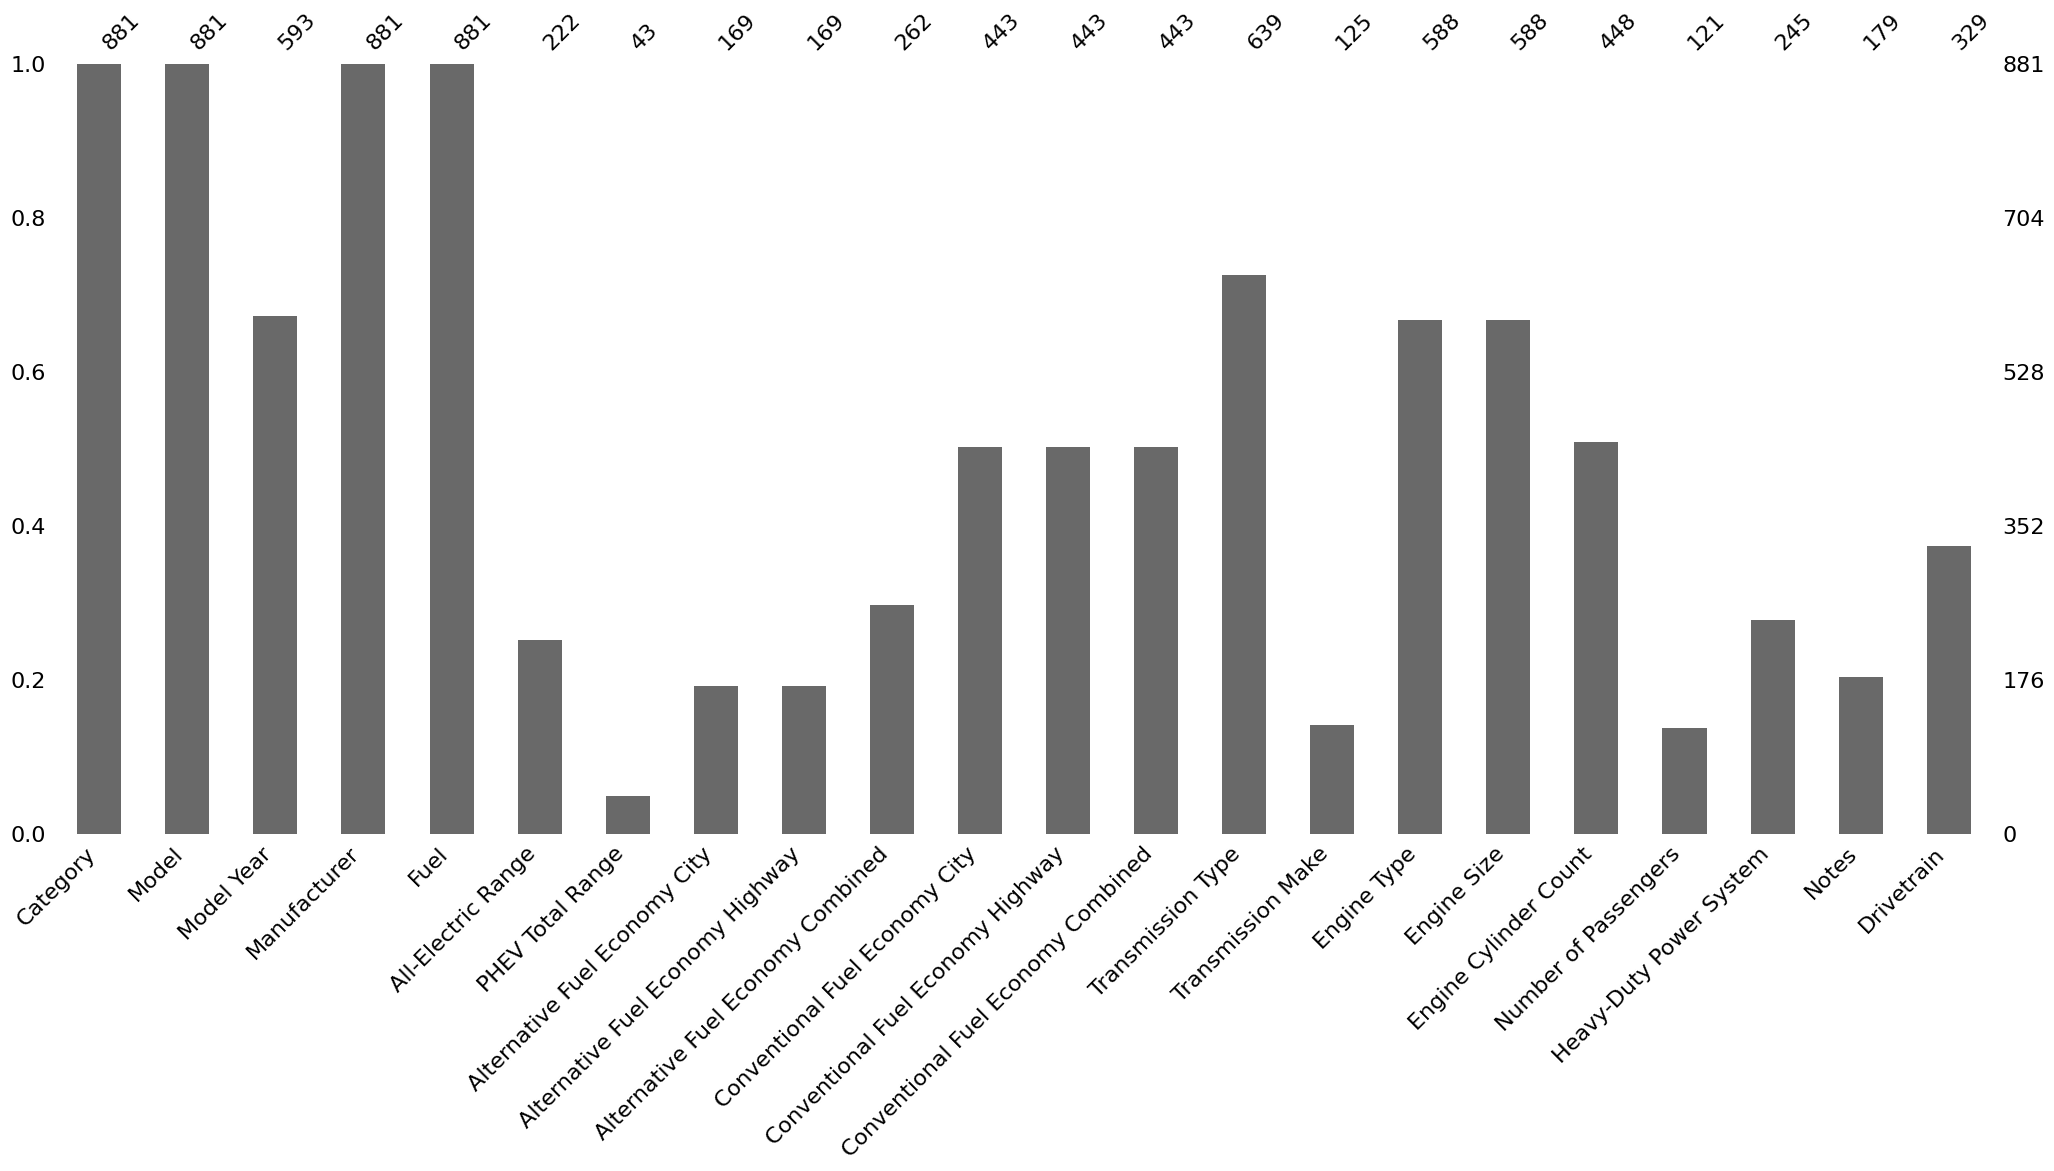

In [8]:
msno.bar(df1)

<Axes: >

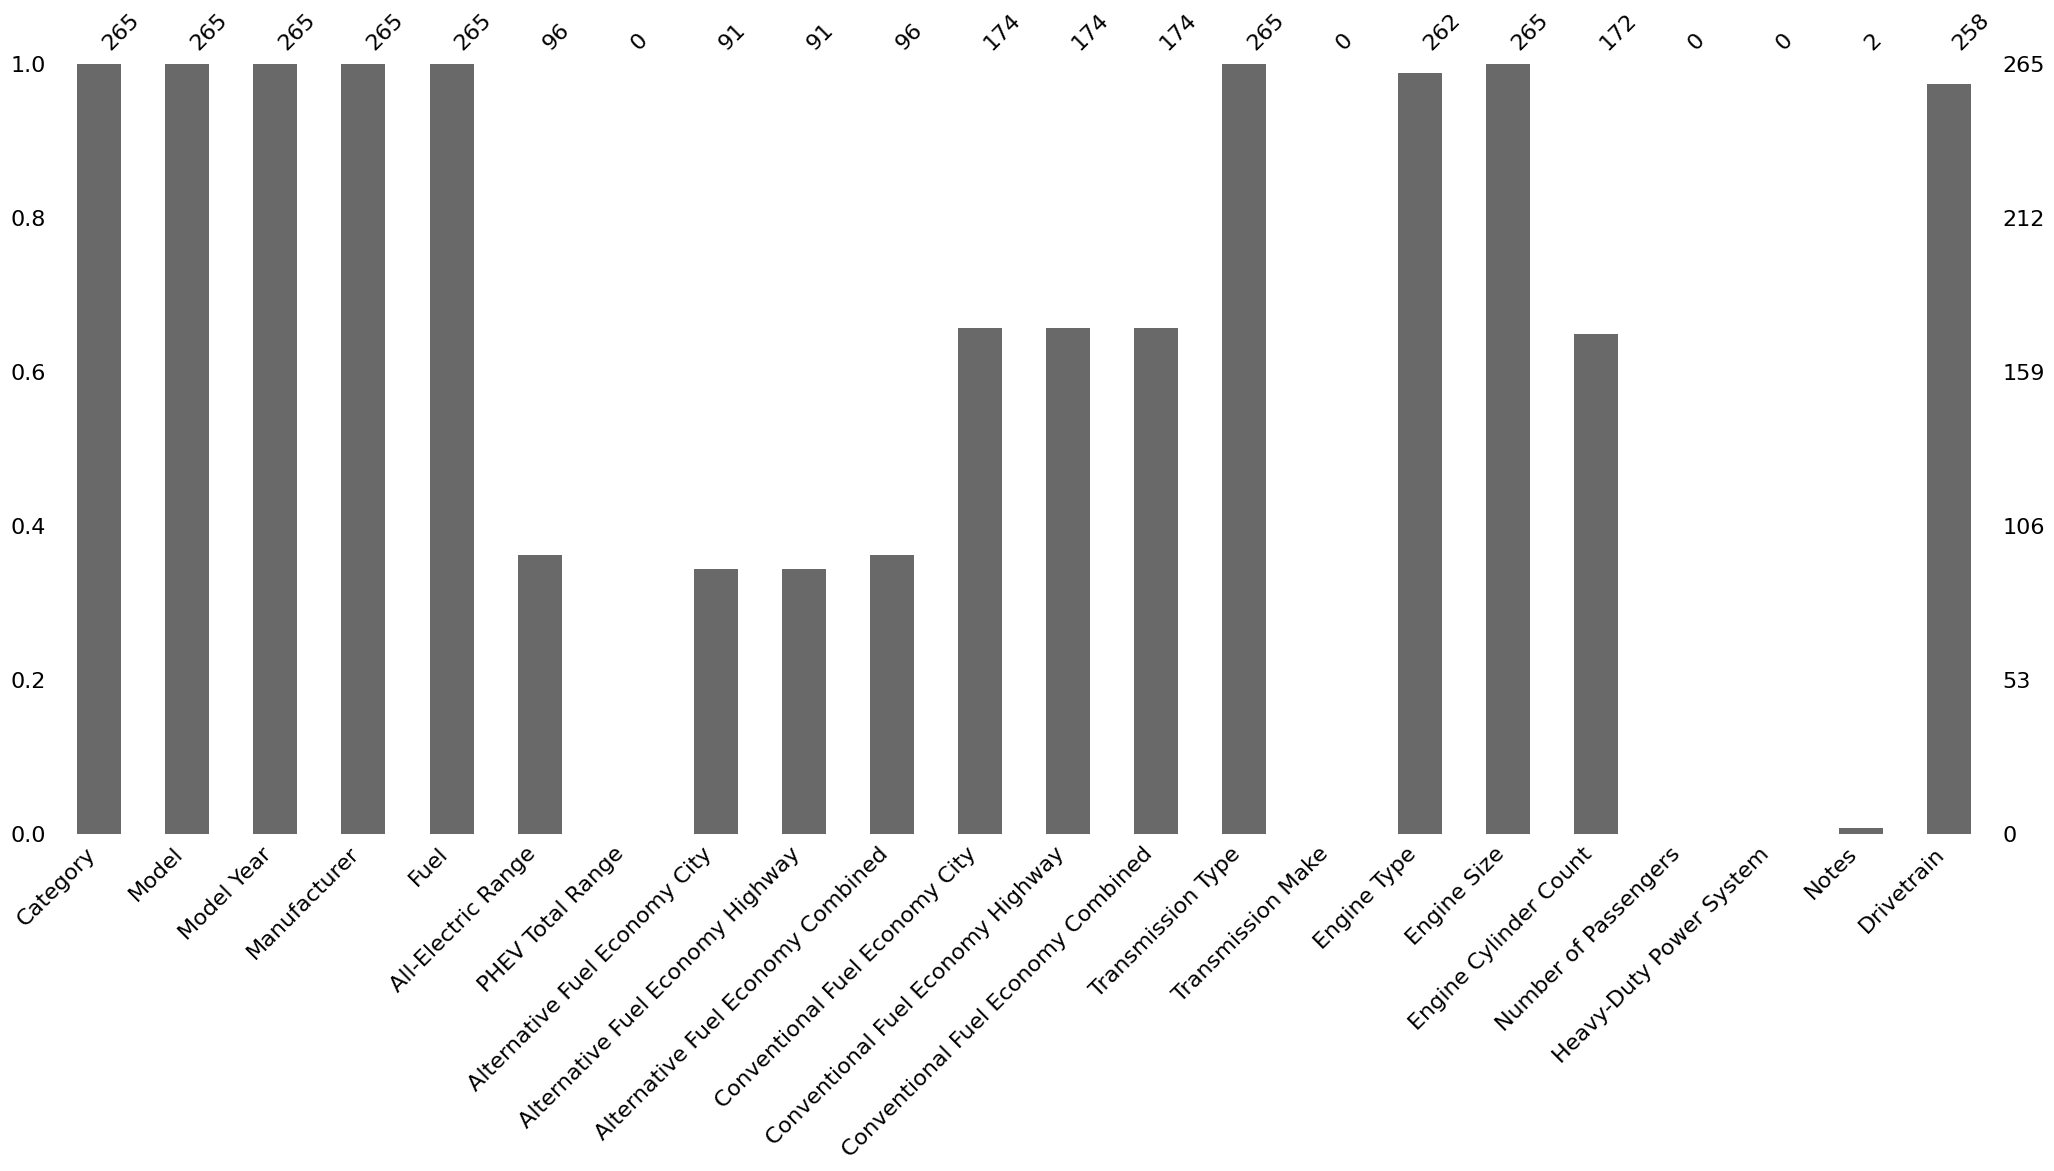

In [73]:
msno.bar(df1[df1.isnull().sum(axis=1) == 9])

Analizando más a fondo, la ausencia de valores, podemos descartar las columnas **PHEV Range**, **Transmission Make**, **Heavy-duty Power System**, **Notes**, y **Numbers of Passangers**. Principalmente por su número de valores faltantes y por su significando en la lógica de negocio. Por otro lado, teniendo el **Engine Size** podríamos descartar **Engine Cylinder Count**, dada la relevancia de esta variable en el consumo final y por ende en la producción de CO2. Además existen otras que posiblemente sean descartadas posteriormente.

In [9]:
df1.columns

Index(['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel',
       'All-Electric Range', 'PHEV Total Range',
       'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway',
       'Alternative Fuel Economy Combined', 'Conventional Fuel Economy City',
       'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'Transmission Type',
       'Transmission Make', 'Engine Type', 'Engine Size',
       'Engine Cylinder Count', 'Number of Passengers',
       'Heavy-Duty Power System', 'Notes', 'Drivetrain'],
      dtype='object')

In [290]:
df1_filtered = df1[['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel', 'All-Electric Range','Alternative Fuel Economy Combined','Conventional Fuel Economy Combined', 'Transmission Type','Engine Size']]

In [291]:
# Normalizamos esta columna, donde auto significa Automatic y Automatic|Manual y Manual|Automatic significan lo mismo.
df1_filtered['Transmission Type'].unique()

array(['Auto', nan, 'Automatic', 'Automatic|Manual', 'Manual|Automatic'],
      dtype=object)

In [292]:
df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic|Manual' if x == 'Manual|Automatic' else x)
df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic' if x == 'Auto' else x)

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\3170418216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic|Manual' if x == 'Manual|Automatic' else x)
C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\3170418216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['Transmission Type'] = df1_filtered['Transmission Type'].apply(lambda x : 'Automatic' if x == 'Auto' else x)


In [293]:
df1_filtered['Model Year'] = df1_filtered['Model Year'].apply(lambda x: int(x) if pd.notnull(x) else int(0))

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\1240827177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered['Model Year'] = df1_filtered['Model Year'].apply(lambda x: int(x) if pd.notnull(x) else int(0))


<Axes: >

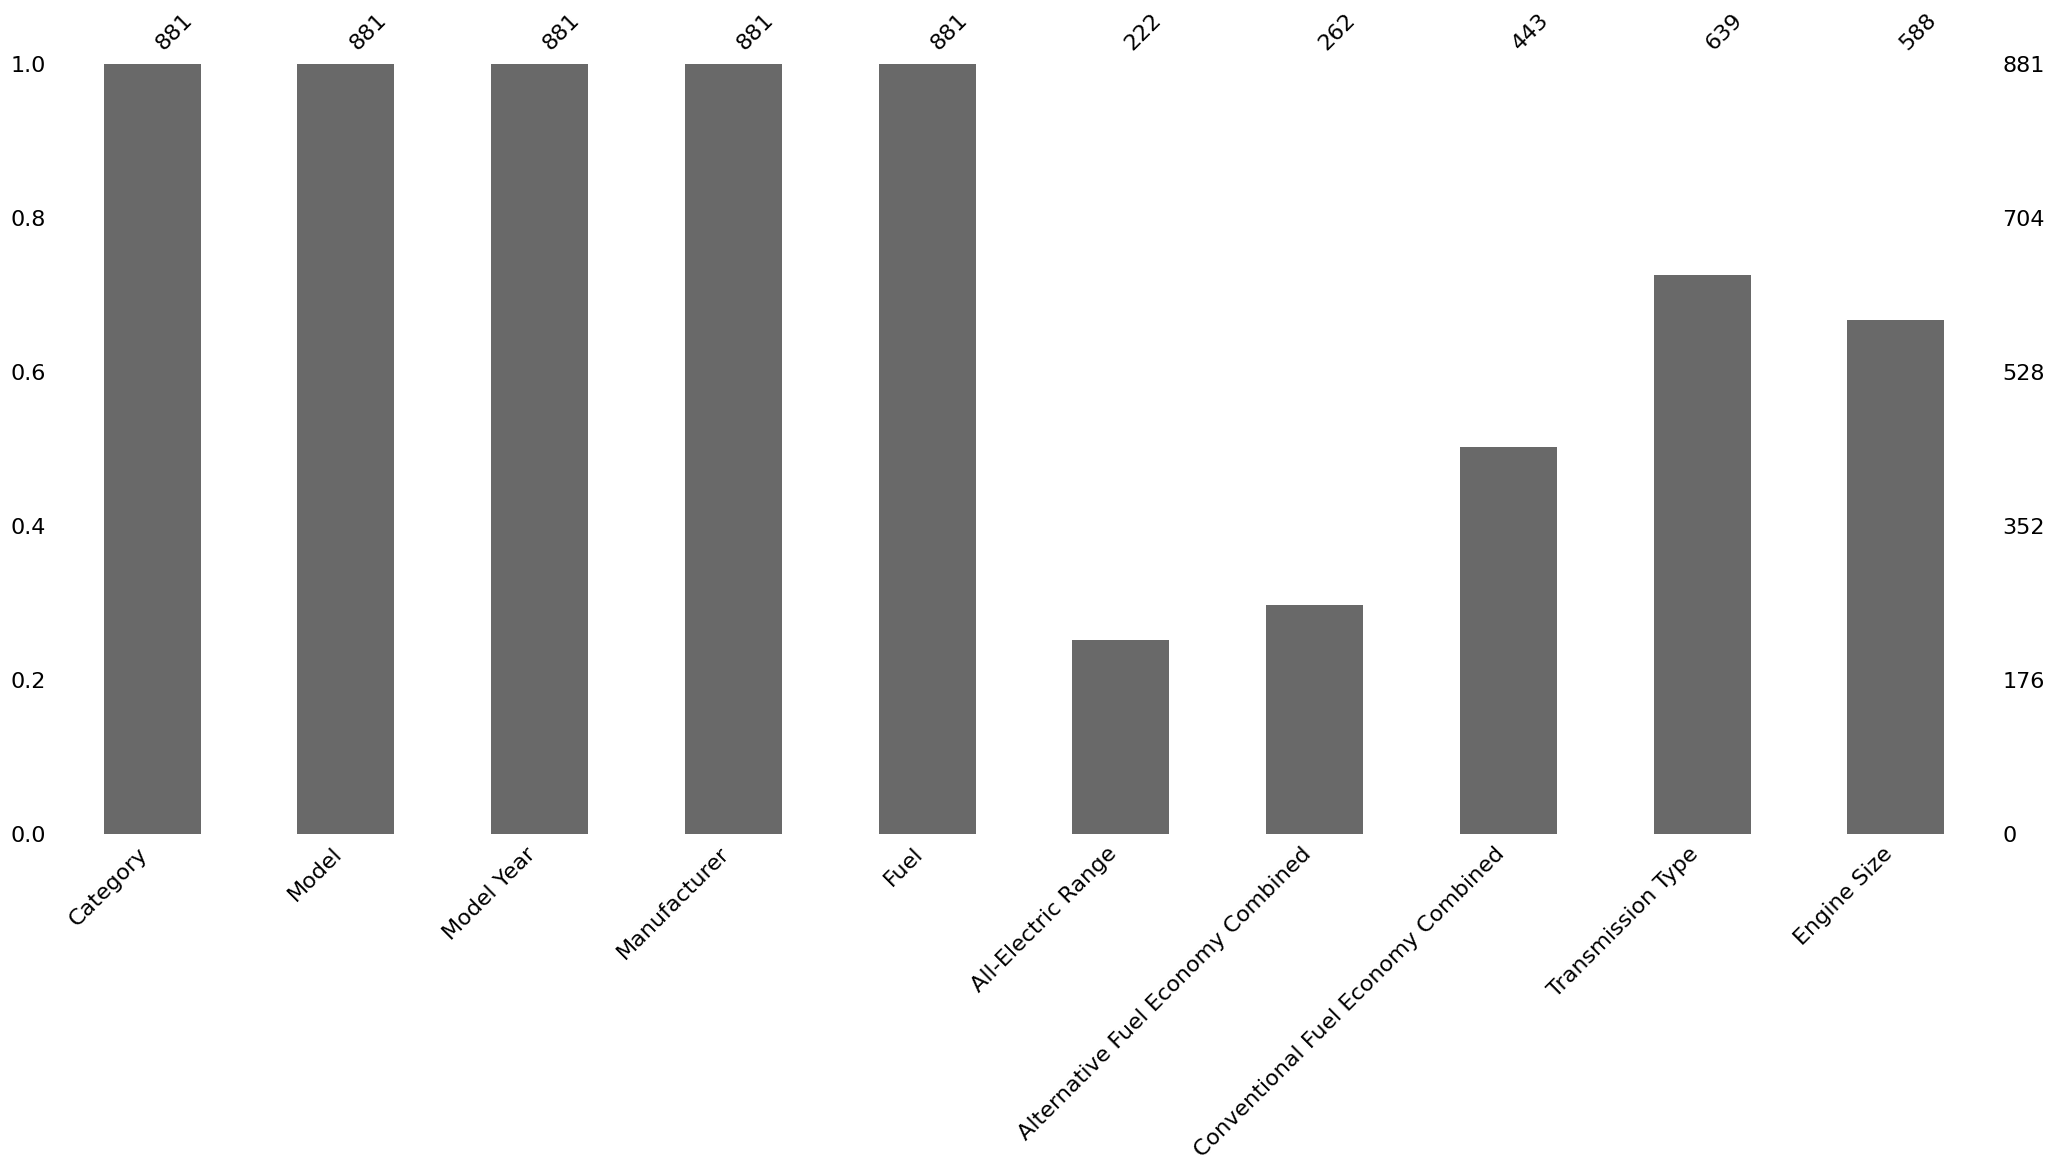

In [294]:
msno.bar(df1_filtered)

In [295]:
df1_filtered.dropna(subset=['Alternative Fuel Economy Combined', 'Conventional Fuel Economy Combined', 'Engine Size'], thresh=1, inplace=True)

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\814829082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered.dropna(subset=['Alternative Fuel Economy Combined', 'Conventional Fuel Economy Combined', 'Engine Size'], thresh=1, inplace=True)


<Axes: >

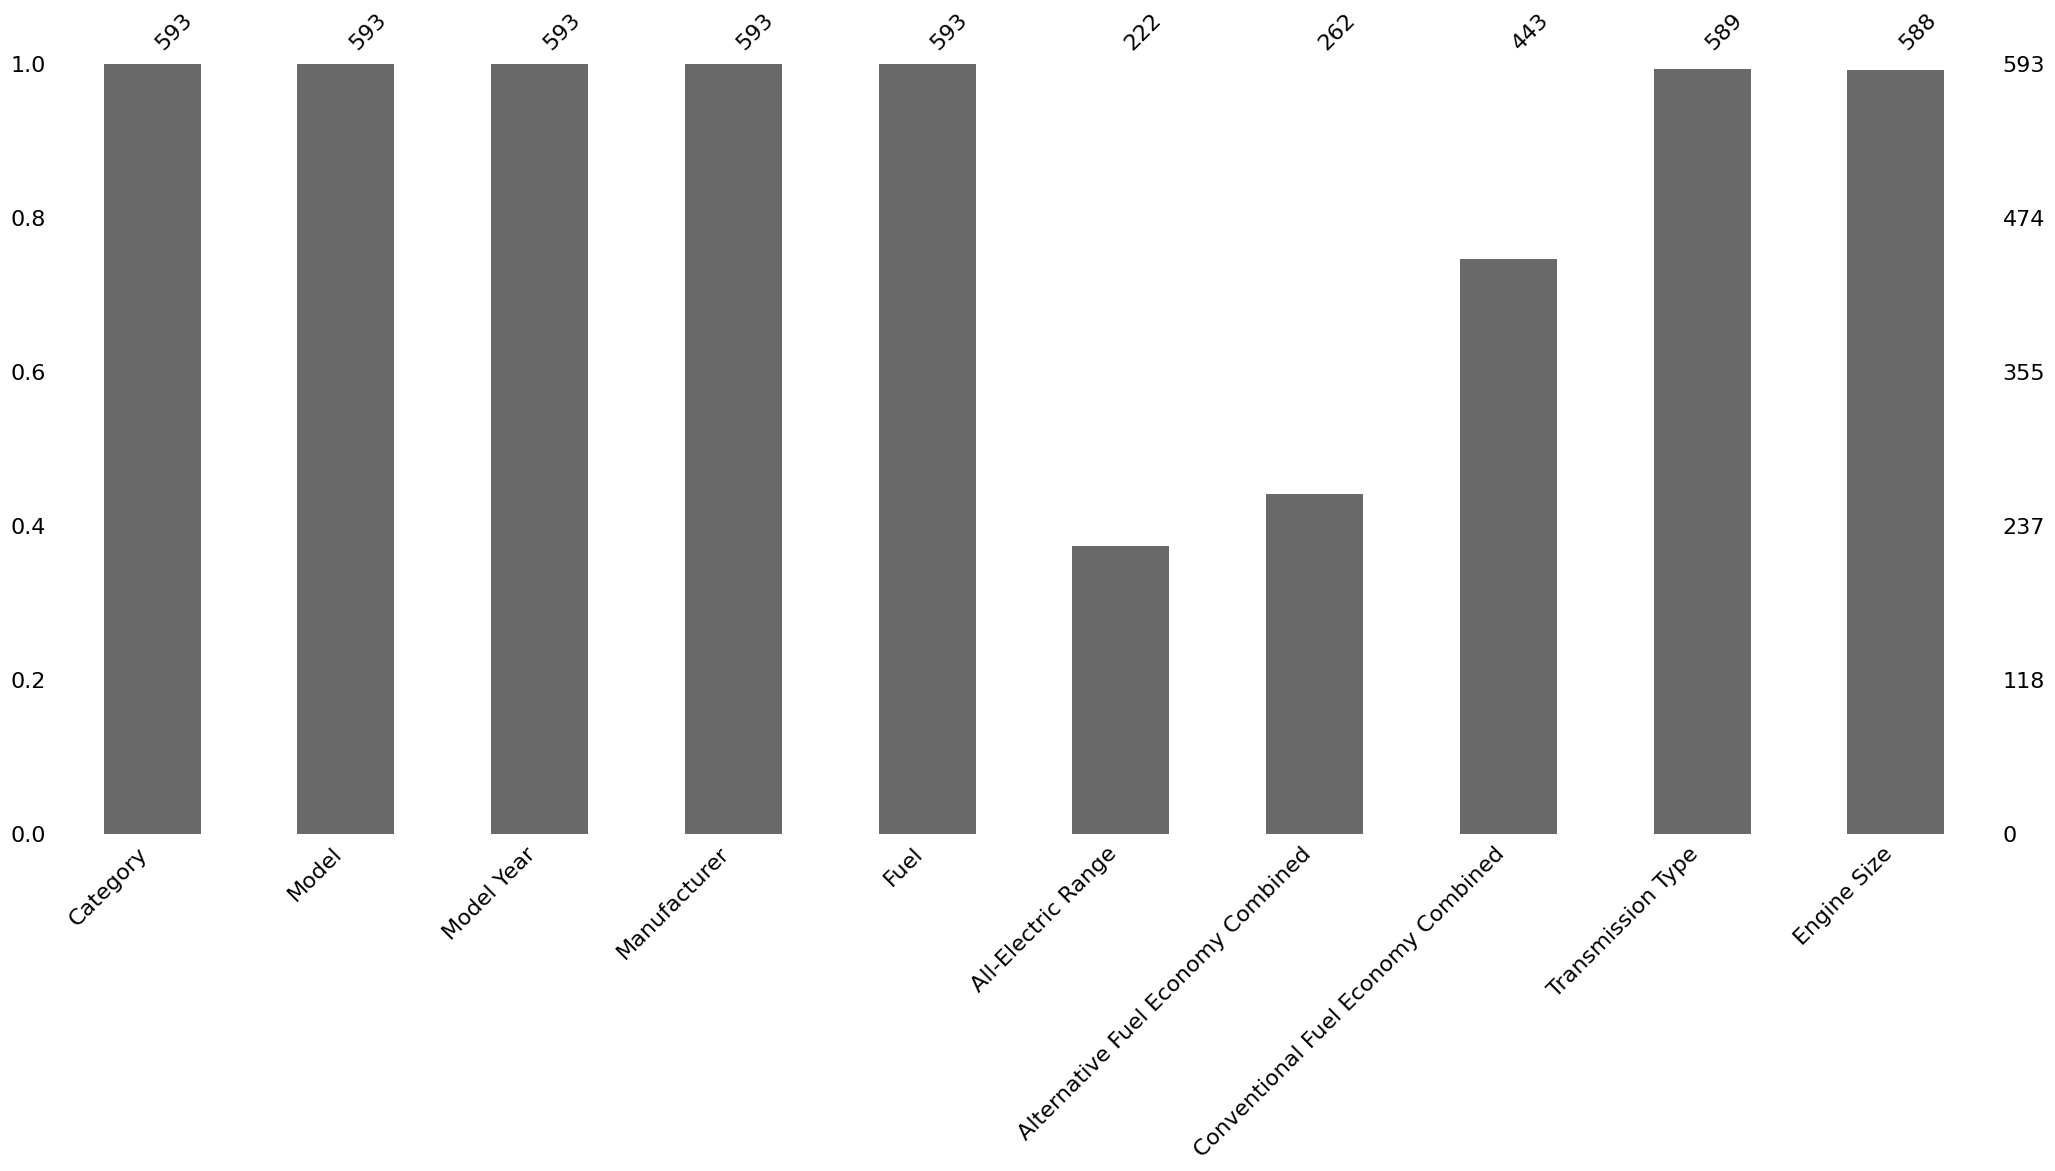

In [296]:
msno.bar(df1_filtered)

In [297]:
# Se concluye que empleando fuel y engine size podemos traspolar valores de economia a los faltantes
df1_filtered.reset_index(inplace=True, drop=True)
faltantes = df1_filtered[df1_filtered[['Alternative Fuel Economy Combined', 'Conventional Fuel Economy Combined']].isnull().sum(axis=1) == 2]

In [299]:
for index, faltante in faltantes.iterrows():
    engine = faltante['Engine Size']
    fuel = faltante['Fuel']
    completo = df1_filtered[(df1_filtered['Engine Size'] == engine) & (df1_filtered['Fuel'] == fuel)]['Conventional Fuel Economy Combined']
    if completo.shape[0] > 1:
        faltantes.loc[index,'Conventional Fuel Economy Combined'] = round(completo.sum() / completo.count(), 0)
        df1_filtered.loc[index, 'Conventional Fuel Economy Combined'] = round(completo.sum() / completo.count(), 0)

In [298]:
for index, faltante in faltantes.iterrows():
    engine = faltante['Engine Size']
    fuel = faltante['Fuel']
    completo = df1_filtered[(df1_filtered['Engine Size'] == engine) & (df1_filtered['Fuel'] == fuel)]['Alternative Fuel Economy Combined']
    if completo.shape[0] > 1:
        faltantes.loc[index,'Alternative Fuel Economy Combined'] = round(completo.sum() / completo.count(), 0)
        df1_filtered.loc[index, 'Alternative Fuel Economy Combined'] = round(completo.sum() / completo.count(), 0)

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\3819167775.py:6: RuntimeWarning: invalid value encountered in scalar divide
  faltantes.loc[index,'Alternative Fuel Economy Combined'] = round(completo.sum() / completo.count(), 0)
C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\3819167775.py:7: RuntimeWarning: invalid value encountered in scalar divide
  df1_filtered.loc[index, 'Alternative Fuel Economy Combined'] = round(completo.sum() / completo.count(), 0)


<Axes: >

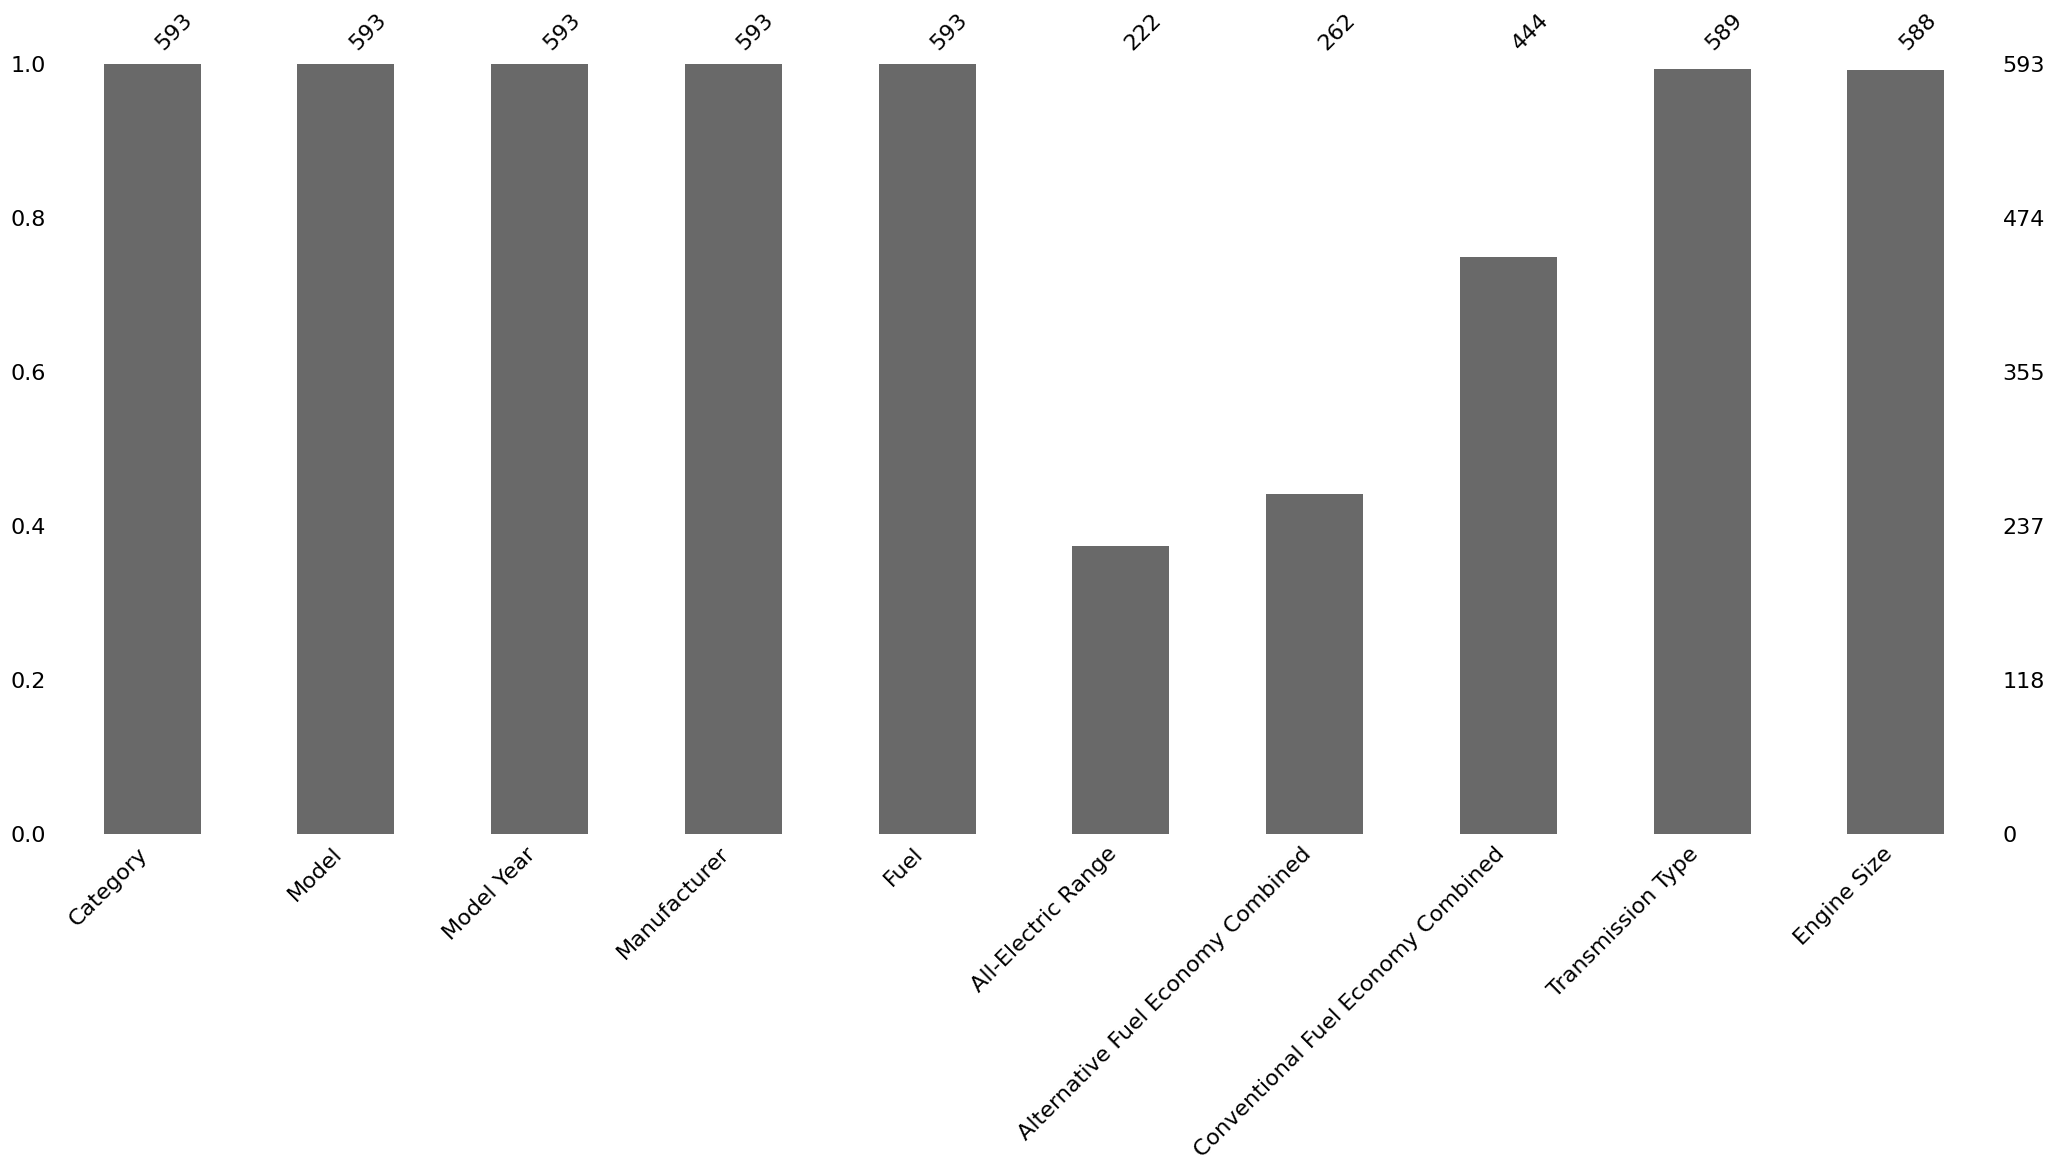

In [302]:
msno.bar(df1_filtered)

No se obtuvo el resultadoe esperado pero se consiguieron unos valores más de manera justificada y lógica.

Nos quedamos con aquellos datos que nos permitan de alguna forma obtener alguna medida de emisiones de Co2, por lo que la economia es una necesidad. En cuanto a calidad obtenemos una buena calidad, a costo de sacrificar filas.

In [311]:
df1_filtered.dropna(subset=['Alternative Fuel Economy Combined', 'Conventional Fuel Economy Combined'], thresh=1, inplace=True)

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\1555040712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered.dropna(subset=['Alternative Fuel Economy Combined', 'Conventional Fuel Economy Combined'], thresh=1, inplace=True)


In [313]:
df1_filtered.shape

(583, 10)

Finalmente eliminamos aquellos duplicados según marca, modelo y tipo de combustible, evitando datos repetidos.

In [315]:
df1_filtered.drop_duplicates(subset=['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel'], inplace=True)

C:\Users\Gaston Luna Paez\AppData\Local\Temp\ipykernel_1256\297307671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_filtered.drop_duplicates(subset=['Category', 'Model', 'Model Year', 'Manufacturer', 'Fuel'], inplace=True)


In [316]:
df1_filtered.shape

(570, 10)

In [319]:
df1_filtered.to_csv('./Datasets_clean/' + dict_files['df1'], index=False)

### ETL Inicial, archivo: **ElectricCarData_Norm.csv**

In [21]:
dict_files['df4']

'ElectricCarData_Norm.csv'

In [22]:
df4 = pd.read_csv('./Datasets/' + dict_files['df4'])
df4.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


### ETL Inicial, archivo:  **ElectricCarData_Clean.csv**

In [3]:
dict_files['df3']

'ElectricCarData_Clean.csv'

In [4]:
df3 = pd.read_csv('./Datasets/' + dict_files['df3'])
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
df3['FastCharge_KmH'].unique() # Valores sin dato tienen '-', por eso aparece como object

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

In [8]:
df3[df3['FastCharge_KmH'] == '-'] = df3[df3['FastCharge_KmH'] == '-'].apply(lambda x: 0) #Reemplazo con 0 los '-', para evitar confictos de tipos de datos en el dw

In [17]:
df3.FastCharge_KmH = df3.FastCharge_KmH.astype('int64')

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


Se concluye quedarse con este archivo y evitar el uso del normalizado ya que su manipulación será más fácil en pasos posteriores, principalmente porque el otro archivo tiene las unidades agregadas en los campos de las filas, además de que representa los booleanos de manera más difícil de trabajar.

In [19]:
df3.to_csv('./Datasets_clean/' + dict_files['df3'], index=False)

### ETL Inicial, archivo:  **taxi+_zone_lookup.csv**

In [51]:
dict_files['df6']

'taxi+_zone_lookup.csv'

In [52]:
df6 = pd.read_csv('./Datasets/' + dict_files['df6'])
df6.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [53]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [54]:
df6[df6['Zone'].isna()]

,LocationID,Borough,Zone,service_zone
264,265,Unknown,NaN,NaN


In [55]:
df6[df6['service_zone'].isna()]

,LocationID,Borough,Zone,service_zone
263,264,Unknown,NV,NaN
264,265,Unknown,NaN,NaN


In [56]:
df6.dropna(subset=['service_zone'], inplace=True)

In [57]:
df6.info() # esos valores de más estaban al final, no habría problema con claves.

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 262
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    263 non-null    int64 
 1   Borough       263 non-null    object
 2   Zone          263 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.3+ KB


In [58]:
df6.sort_values(by = ['LocationID'], inplace=True, ascending=True)

In [59]:
df6.to_csv('./Datasets_clean/' + dict_files['df6'], index=False)

### ETL inicial, archvivo: **taxi_zones.csv** 

In [120]:
zones = pd.read_csv('./Datasets_clean/taxi_zones.csv')
zones.head()

,"OBJECTID,N,9,0","Shape_Leng,N,19,11","Shape_Area,N,19,11","zone,C,254","LocationID,N,4,0","borough,C,254"
0,1,"0,116357453189","0,0007823067885",Newark Airport,1,EWR
1,2,"0,43346966679","0,00486634037837",Jamaica Bay,2,Queens
2,3,"0,0843411059012","0,000314414156821",Allerton/Pelham Gardens,3,Bronx
3,4,"0,0435665270921","0,000111871946192",Alphabet City,4,Manhattan
4,5,"0,0921464898574","0,000497957489363",Arden Heights,5,Staten Island


In [121]:
zones.drop(columns=['OBJECTID,N,9,0'], inplace=True)

In [122]:
# Tenia estos nombres feos Shape_Leng,N,19,11	Shape_Area,N,19,11	zone,C,254	LocationID,N,4,0	borough,C,254
zones.columns = ['Shape_Leng', 'Shape_Area', 'Zone', 'LocationID', 'Borough']

In [123]:
zones[zones['LocationID'].duplicated()]

,Shape_Leng,Shape_Area,Zone,LocationID,Borough
56,"0,0192705048557","0,0000180259807917",Corona,56,Queens
103,"0,0212208330928","0,0000119205339715",Governor's Island/Ellis Island/Liberty Island,103,Manhattan
104,"0,0774253398314","0,000368636392805",Governor's Island/Ellis Island/Liberty Island,103,Manhattan


In [124]:
zones['LocationID'].value_counts().head()

LocationID
103    3
56     2
1      1
176    1
181    1
Name: count, dtype: int64

In [125]:
zones.drop_duplicates(subset=['LocationID'], inplace=True)

In [126]:
zones.sort_values(by=['LocationID'])

,Shape_Leng,Shape_Area,Zone,LocationID,Borough
0,"0,116357453189","0,0007823067885",Newark Airport,1,EWR
1,"0,43346966679","0,00486634037837",Jamaica Bay,2,Queens
2,"0,0843411059012","0,000314414156821",Allerton/Pelham Gardens,3,Bronx
3,"0,0435665270921","0,000111871946192",Alphabet City,4,Manhattan
4,"0,0921464898574","0,000497957489363",Arden Heights,5,Staten Island
...,...,...,...,...,...
258,"0,126750305191","0,000394552487366",Woodlawn/Wakefield,259,Bronx
259,"0,133514154636","0,000422345326907",Woodside,260,Queens
260,"0,0271204563616","0,0000343423231652",World Trade Center,261,Manhattan
261,"0,0490636231541","0,000122330270966",Yorkville East,262,Manhattan


In [115]:
df6 # Coinciden los lcationID , se trata de los mismos datos

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone


In [116]:
zones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 262
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Shape_Leng  260 non-null    object
 1   Shape_Area  260 non-null    object
 2   Zone        260 non-null    object
 3   LocationID  260 non-null    int64 
 4   Borough     260 non-null    object
dtypes: int64(1), object(4)
memory usage: 12.2+ KB


In [128]:
zones.Shape_Area = zones.Shape_Area.apply(lambda x: float(x.replace(',', '.'))) #Casteo a float, reemplazando valores

In [130]:
zones.Shape_Leng = zones.Shape_Leng.apply(lambda x: float(x.replace(',', '.')))

In [131]:
zones.to_csv('./Datasets_clean/taxi_zones.csv', index=False)